# Dubai Real Estate Price Prediction Code
## Rental Properties Dataset EDA

- Kiana Johnson & Thomas Myers (Group 2B)
- CDS-492, Dr. Slamani

### "Dubai Real Estate Goldmine Dubai, UAE Rental Market":

This dataset provides over 70,000 entries of rental property listings in across various cities in the United Arab Emirates, including Dubai before and during 2024. Specifically, it focuses primarily on physical attributes of the properties, which will help in identifying physical variables that influence real estate prices.

## Exploratory Data Analysis (EDA)

EDA is crucial for predicting real estate prices in Dubai. Specifically, using techniques such as data visualization through charts and graphs, making patterns and outliers easier to identify. At the same time, statistical analysis helps to quantify these relationships and assess the impact of various factors on property values, helping refine predictive models and improve accuracy. Together, these techniques enhance the understanding and prediction of real estate prices.

In [1]:
# importing necessary packages:

# analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning Raw Data

In [2]:
# loading in the uncleaned .csv dataset file
prop = pd.read_csv('dubai_properties.csv') # rentals in dubai area

In [3]:
print(prop.head(3)) # viewing the first few rows of data
print(prop.info()) # 73742 entries, 17 columns: 'Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft', 'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose', 'Posted_date', 'Age_of_listing_in_days', 'Location', 'City', 'Latitude', 'Longitude'
print(prop.isnull().sum()) # checking for null values in data (total of 719 in latitude and longitude, but not necessary to drop)

                                             Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Yearly   

    Furnishing   Purpose Posted_date  Age_of_listing_in_days        Location  \
0  Unfurnished  For Rent  2024-03-07                      45  Al Reem Island   
1  Unfurnished  For Rent  2024-03-08                      44      Yas Island   
2    Furnished  For Rent  2024-03-21                      31   Al Raha Beach   

        City   Latitude  Longitude  
0  Abu Dhabi  24.493598  54.407841  
1  Abu Dhabi  24.49

In [4]:
# renaming 'prop' columns for easier use and accessibility
prop_cols = {'Address': 'address',
             'Rent': 'rent',
             'Beds': 'beds',
             'Baths': 'baths',
             'Type': 'type',
             'Area_in_sqft': 'area_sqft',
             'Rent_per_sqft': 'rent_sqft',
             'Rent_category': 'rent_category',
             'Frequency': 'frequency',
             'Furnishing': 'furnishing',
             'Purpose': 'purpose',
             'Posted_date': 'date',
             'Age_of_listing_in_days': 'listing_age_days',
             'Location': 'location',
             'City': 'city',
             'Latitude': 'lat',
             'Longitude': 'long'}

prop.rename(columns = prop_cols, inplace = True)

In [5]:
# extracting the year from the date column (to further explore the time variable)
prop['date'] = pd.to_datetime(prop['date']) # converting column to datetime column type
prop['year'] = prop['date'].dt.year

# filtering rows where city is dubai
# 34250 entries
prop = prop[prop['city'] == 'Dubai'].copy()

# converting 'rent' column in AED to USD
prop['rent_usd'] = prop['rent'] * 0.27
prop['rent'] = prop['rent_usd']
prop.drop(columns=['rent_usd'], inplace=True)

# dropping non important and redundant variables
prop.drop(columns=['city', 'date', 'lat', 'long', 'address', 'rent_sqft', 'frequency'], inplace=True)

In [6]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34250 entries, 29068 to 63317
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              34250 non-null  float64
 1   beds              34250 non-null  int64  
 2   baths             34250 non-null  int64  
 3   type              34250 non-null  object 
 4   area_sqft         34250 non-null  int64  
 5   rent_category     34250 non-null  object 
 6   furnishing        34250 non-null  object 
 7   purpose           34250 non-null  object 
 8   listing_age_days  34250 non-null  int64  
 9   location          34250 non-null  object 
 10  year              34250 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 3.1+ MB


In [7]:
prop.to_csv('cleaned_properties.csv', index = False) # saving clean data into a .csv file
round(prop.describe(), 2) # overview of numerical values of cleaned dataset

,rent,beds,baths,area_sqft,listing_age_days,year
count,34250.00,34250.00,34250.00,34250.00,34250.00,34250.00
mean,57608.92,1.97,2.08,1831.81,63.91,2023.86
std,115357.20,1.40,0.56,3119.02,55.18,0.36
min,0.00,0.00,1.00,74.00,12.00,2021.00
25%,22950.00,1.00,2.00,754.00,27.00,2024.00
50%,39150.00,2.00,2.00,1163.00,46.00,2024.00
75%,62100.00,3.00,2.00,1930.75,81.00,2024.00
max,14850000.00,12.00,11.00,210254.00,1131.00,2024.00


### Data Cleaning Summary:

- #### Raw Dataset: (20 columns, 73742 entries)
    - Checked for both null and missing values (only 719 in longitude & latitude, which aren't as relevant, so it is acceptable)
    - Renamed columns so that they are both meaningful and easy to access
    - Casted the 'date' column from a string to an date data type. Then extracted the 'year' from the data, because month and day are less important.
    - Filtered through the data to only include 'Dubai' as a city
    - Converted the 'rent' column to USD from AED
    - Dropped unnecessary columns in context of analysis
        - 'date', 'city', & 'frequency' because they contain information we no longer need
        - 'lat', 'long', 'address' because they are too specific of a location to use effectively
        - 'rent_sqft' because it is a measurement of rent, and is redundant
    - Saved as a new .csv file 'cleaned_properties.csv'
    
- #### Cleaned Dataset: (11 columns, 34250 entries)
    - Data Types:
        - int: 'rent', 'beds', 'baths', 'area_sqft', 'listing_age_days', 'year'
        - string: 'type', 'rent_category', 'frequency', 'furnishing', 'purpose', 'location'

## Desciptive Analytics

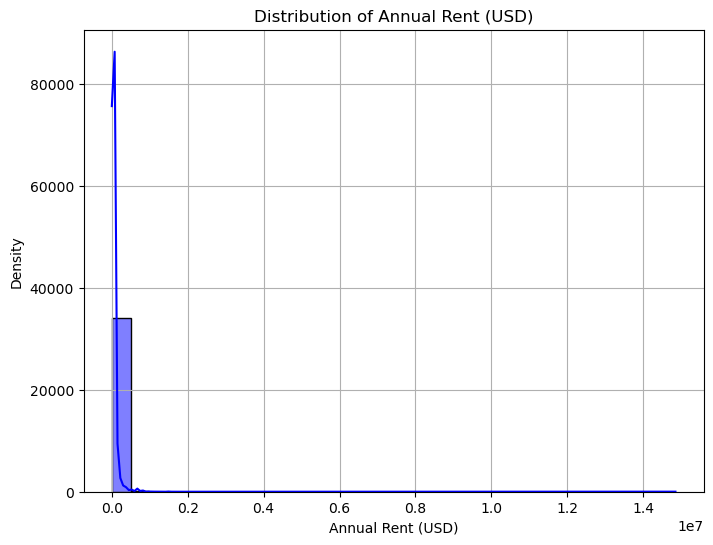

In [8]:
# observing the distribution of rent, itself.
plt.figure(figsize=(8, 6))
sns.histplot(prop['rent'], kde=True, bins=30, color='blue', edgecolor='black')
plt.xlabel('Annual Rent (USD)')
plt.ylabel('Density')
plt.title('Distribution of Annual Rent (USD)')
plt.grid(True)
plt.show()

# extremely right skewed, needs outlier removal

In [9]:
# removing outliers
num_cols = ['rent', 'beds', 'area_sqft', 'listing_age_days']

# defining function to remove outliers based on IQR
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[((df[columns] >= lower_bound) & (df[columns] <= upper_bound)).all(axis=1)]

# remove them and update dataframe
prop = remove_outliers(prop, num_cols)

In [10]:
# removing rent values that are $0, because it does not make logical sense
prop = prop[prop['rent'] > 0].copy()

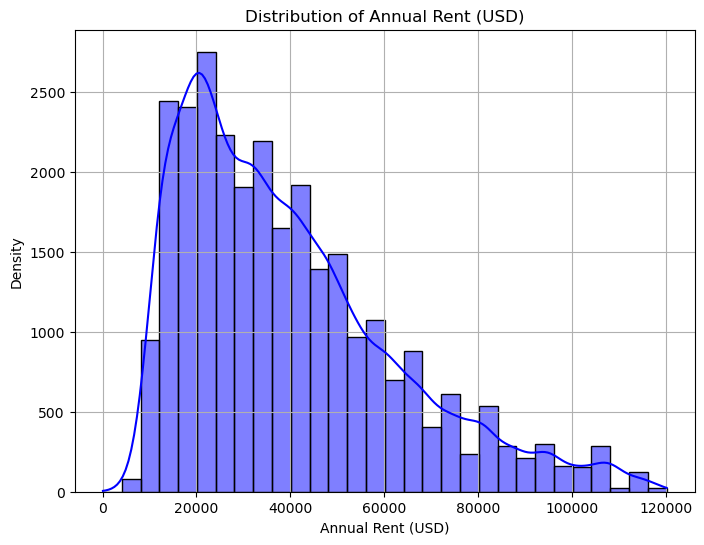

In [11]:
# observing the distribution of rent, again to confirm that all necessary outliers are removed
plt.figure(figsize=(8, 6))
sns.histplot(prop['rent'], kde=True, bins=30, color='blue', edgecolor='black')
plt.xlabel('Annual Rent (USD)')
plt.ylabel('Density')
plt.title('Distribution of Annual Rent (USD)')
plt.grid(True)
plt.show()

# still right-skewed, but it can still be worked with

In [12]:
prop.to_csv('out_properties.csv', index = False) # saving clean data into a .csv file
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28397 entries, 29068 to 63315
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              28397 non-null  float64
 1   beds              28397 non-null  int64  
 2   baths             28397 non-null  int64  
 3   type              28397 non-null  object 
 4   area_sqft         28397 non-null  int64  
 5   rent_category     28397 non-null  object 
 6   furnishing        28397 non-null  object 
 7   purpose           28397 non-null  object 
 8   listing_age_days  28397 non-null  int64  
 9   location          28397 non-null  object 
 10  year              28397 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ MB


### DA - Snapshot (1):

- Graphed the distribution of annual rent (USD) and discovered severe right-skewedness in the data, so removed outliers with a function using the IQR method.
- Graphed again to ensure that necessary outliers were removed.
    - Still discovered right-skewedness, but will not further tamper with the data due to valid data points still included.
    - Must keep in mind that mean will be greater than median in further analysis
- Saved as another .csv file ('out_properties.csv)
- #### Outlier Removed Dataset: (11 columns, 28397 entries)

In [13]:
# generating a summary statistics report for each of the numerical value columns
print(prop.describe().round(2))

# generating a summary statistics report for each of the numerical value columns
print(prop.describe(include = 'object'))

            rent      beds     baths  area_sqft  listing_age_days      year
count   28397.00  28397.00  28397.00   28397.00          28397.00  28397.00
mean    39514.30      1.66      2.04    1217.86             53.06   2023.92
std     22979.99      1.11      0.40     699.17             34.72      0.27
min        78.30      0.00      1.00      74.00             12.00   2023.00
25%     21600.00      1.00      2.00     722.00             26.00   2024.00
50%     34020.00      2.00      2.00    1058.00             43.00   2024.00
75%     51300.00      2.00      2.00    1568.00             72.00   2024.00
max    120150.00      6.00      6.00    3695.00            162.00   2024.00
             type rent_category   furnishing   purpose  \
count       28397         28397        28397     28397   
unique          8             3            2         1   
top     Apartment          High  Unfurnished  For Rent   
freq        23707         12278        17086     28397   

                         

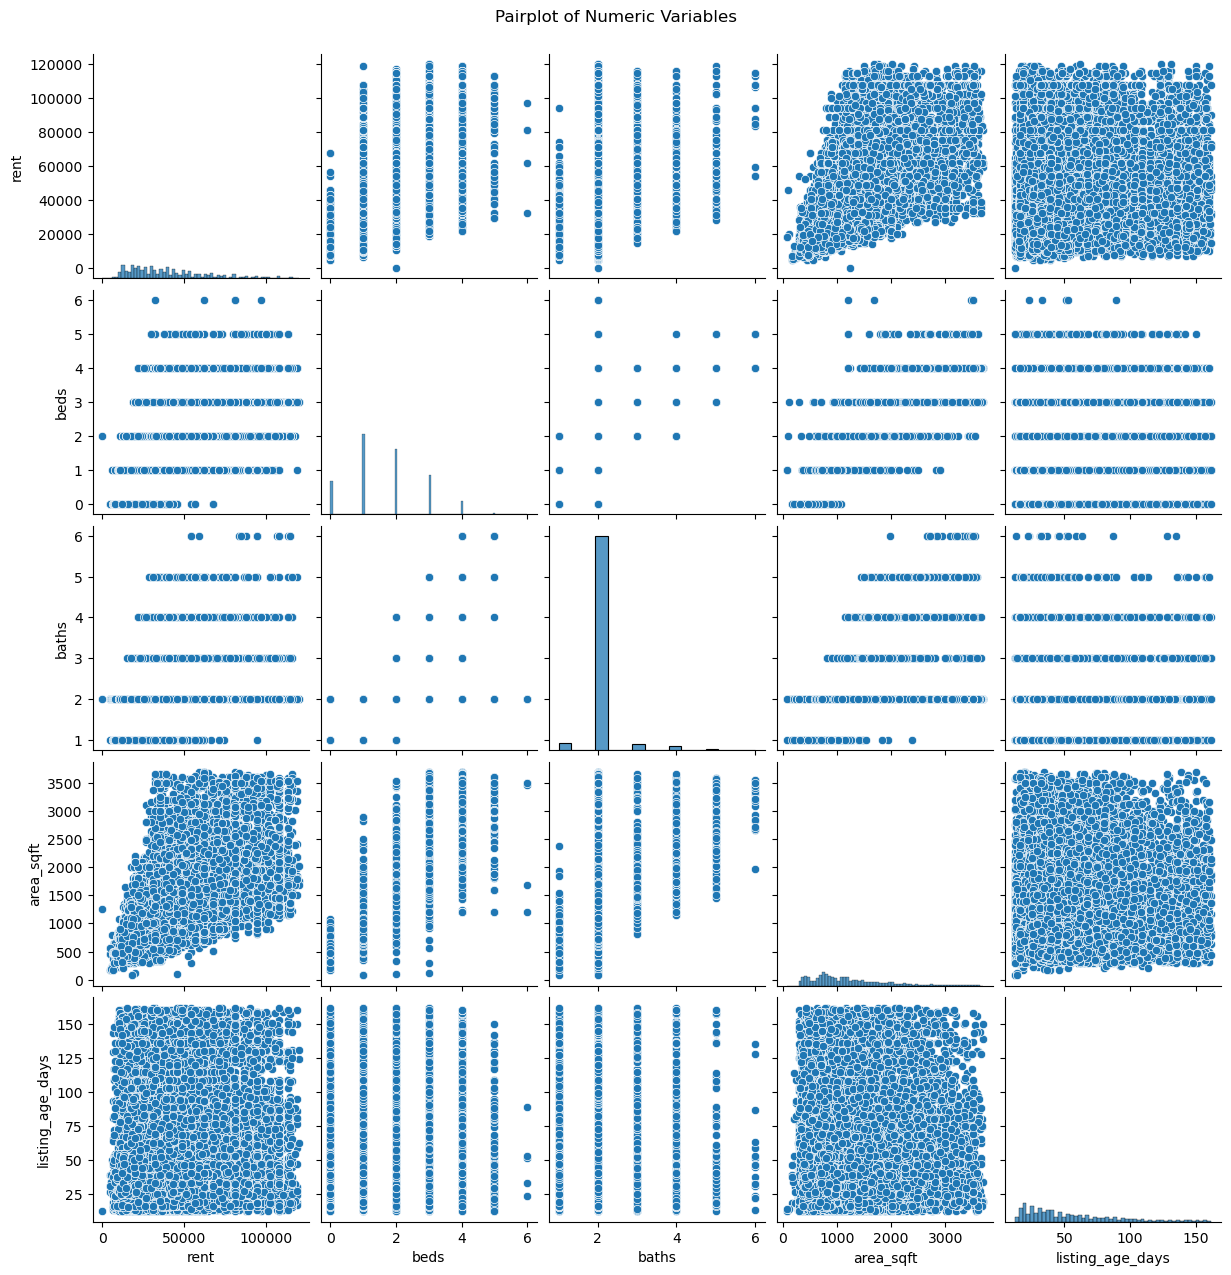

In [14]:
# using a pair plot to learn more about the numerical variables
numeric_vars = ['rent', 'beds', 'baths', 'area_sqft', 'listing_age_days']
sns.pairplot(prop[numeric_vars])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

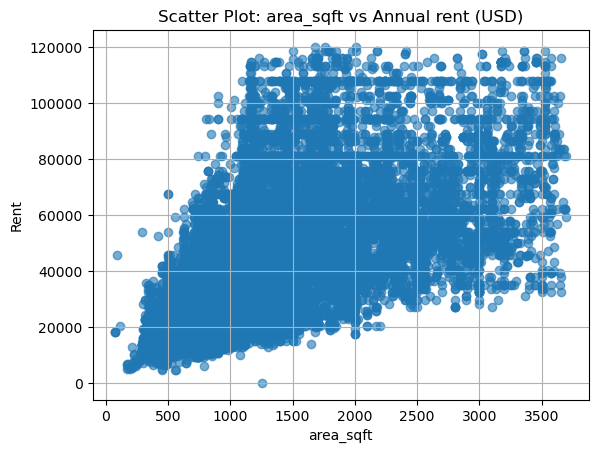

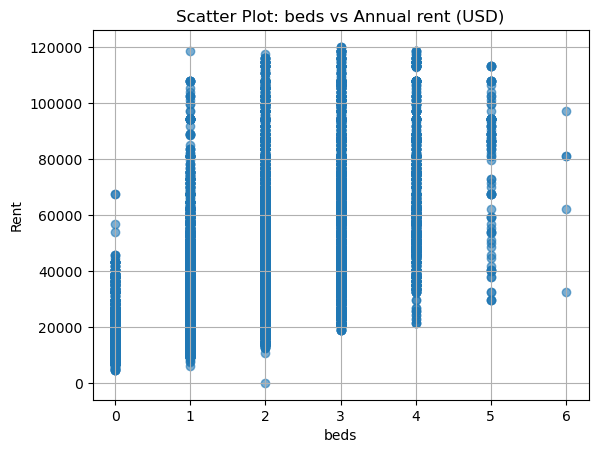

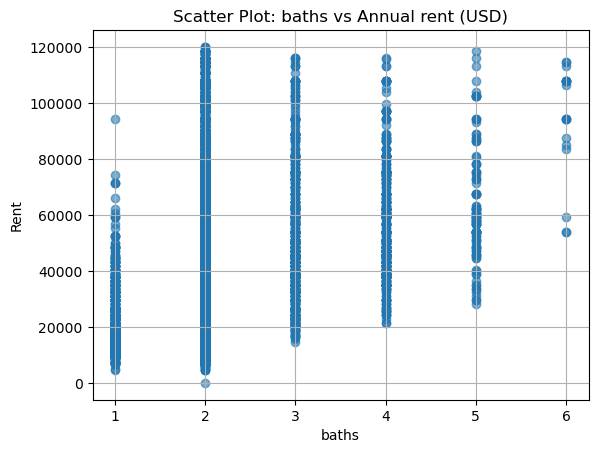

In [15]:
# graphing each important numerical variable with 'rent' price as a response variable individually
num_cols_interest = ['area_sqft', 'beds', 'baths']

# creating a scatter plot for each 'x' and 'rent' price relationship
for col in num_cols_interest:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(prop[col], prop['rent'], alpha=0.6)
    plt.title(f'Scatter Plot: {col} vs Annual rent (USD)')  # Use f-string to include the column name
    plt.xlabel(col)
    plt.ylabel('Rent')
    plt.grid(True)
    plt.show()

/var/folders/j9/hbqcn43j673gxw7nrdsvfkfh0000gn/T/ipykernel_10794/4180071491.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  prop_corr_mx = prop.corr()


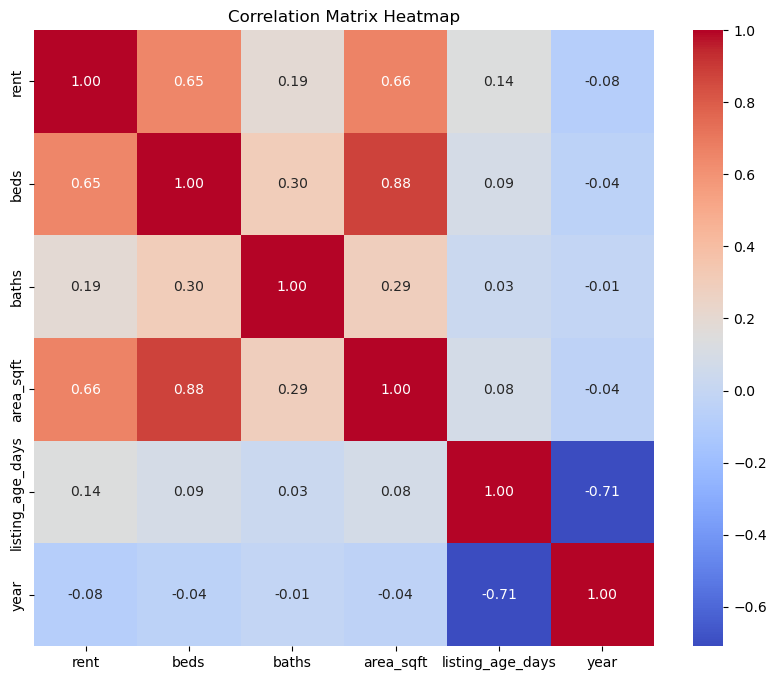

In [16]:
# generating a correlation matrix to see which variables have associations with each other
prop_corr_mx = prop.corr()

# plotting matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(prop_corr_mx, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

# shows a strong correlation and relationship between 'rent' and the 'beds', and 'area_sqft'

### DA - Snapshot (2):

- Generated a summary statistics report for both categorical and numerical variables to gain a bird's-eye view of the data
- Explored numerical values and their relationship with the annual rent (USD)
    - Found that 'beds', 'area_sqft', and 'baths' primarily impact the 'rent' variable
    
- #### Correlation Matrix Heatmap:
    - This correlation matrix heatmap displays all correlation values for each numerical variable combination. In terms of the 'rent' variable, the 'area_sqft', 'beds', and 'baths' columns have the most correlation.
- #### Pair Plot / Scatter Plots:
    - They all graphically show a positive linear relationship between 'rent' and the 'beds', 'baths', and 'area_sqft' variables. This confirms their validity as predictors of annual rent.

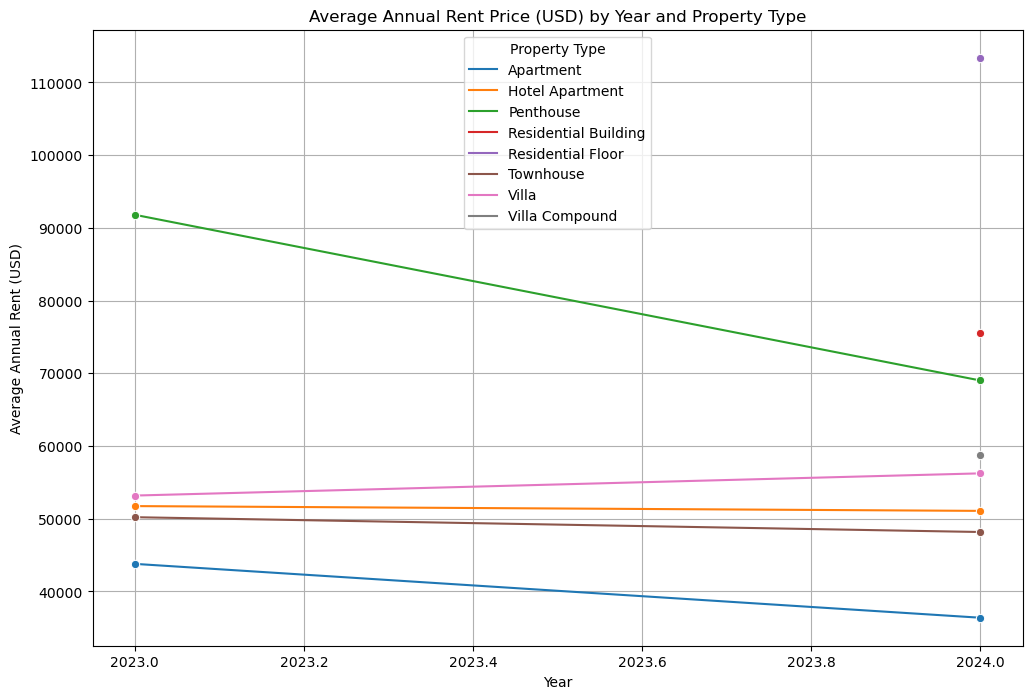

In [17]:
# observing how the 'rent' changes by year, when grouped by 'type':

## calculate mean 'rent' for each 'year' and 'property_type' ##
prop_prop_year_values = prop.groupby(['type', 'year'])['rent'].mean().reset_index()

# combining graphs for easier comparison
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='rent', hue='type', data = prop_prop_year_values, marker='o')
plt.title('Average Annual Rent Price (USD) by Year and Property Type')
plt.xlabel('Year')
plt.ylabel('Average Annual Rent (USD)')
plt.grid(True)
plt.legend(title='Property Type')
plt.show()

# most data is from 2023 and after, but residential buildings and residential floors seem to have the most positive impact on rent price.

In [18]:
# exploring the data's categorical variables to see their influence on 'actual_worth'
prop_cat_cols = ['type', 'rent_category', 'furnishing']

# seeing what the unique values are for each column
for col in prop_cat_cols:
    prop_cat_unique = prop[col].unique()
    num_unique = len(prop_cat_unique)
    print(col, ':', num_unique)
    print(prop_cat_unique)
    print()

type : 8
['Apartment' 'Townhouse' 'Villa' 'Hotel Apartment' 'Penthouse'
 'Villa Compound' 'Residential Floor' 'Residential Building']

rent_category : 3
['Medium' 'Low' 'High']

furnishing : 2
['Unfurnished' 'Furnished']



In [19]:
# grouping 'rent' by categorical variables in descending order

# 'type'
prop_type_stats = prop.groupby('type')['rent'].describe().sort_values(by='mean', ascending=False)
print(prop_type_stats)
print()

# 'furnishing'
prop_furnishing_stats = prop.groupby('furnishing')['rent'].describe().sort_values(by='mean', ascending=False)
print(prop_furnishing_stats)
print()

                        count           mean           std       min  \
type                                                                   
Residential Floor         1.0  113400.000000           NaN  113400.0   
Residential Building      2.0   75600.000000      0.000000   75600.0   
Penthouse                38.0   72011.096053  29701.727907   20223.0   
Villa Compound            4.0   58725.000000  20812.195944   28350.0   
Villa                  2182.0   55976.065160  21319.981440   11610.0   
Hotel Apartment         381.0   51160.200236  23644.401745   13500.0   
Townhouse              2082.0   48358.754481  16256.809497   16200.0   
Apartment             23707.0   36973.761961  22684.814152      78.3   

                            25%       50%       75%       max  
type                                                           
Residential Floor     113400.00  113400.0  113400.0  113400.0  
Residential Building   75600.00   75600.0   75600.0   75600.0  
Penthouse              

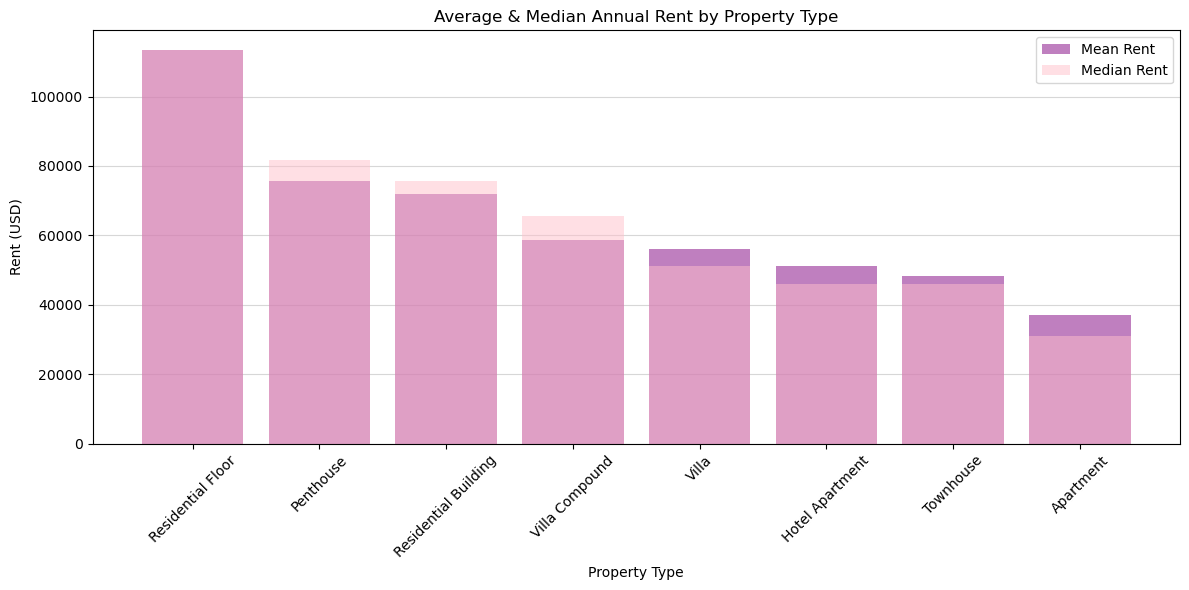

In [20]:
# exploring annual rent grouped by property type

# mean rent by property type
prop_mean_type_rent = prop.groupby('type')['rent'].mean().reset_index()
prop_mean_type_rent = prop_mean_type_rent.sort_values(by='rent', ascending=False)

# median rent by property type
prop_median_type_rent = prop.groupby('type')['rent'].median().reset_index()
prop_median_type_rent = prop_median_type_rent.sort_values(by='rent', ascending=False)

# plotting
plt.figure(figsize=(12, 6))
plt.bar(prop_mean_type_rent['type'], prop_mean_type_rent['rent'], color='purple', alpha=0.5, label='Mean Rent', zorder=2)
x_pos = range(len(prop_median_type_rent['type']))
plt.bar(x_pos, prop_median_type_rent['rent'], color='pink', alpha=0.5, label='Median Rent', zorder=2)
plt.xticks(x_pos, prop_median_type_rent['type'], rotation=45)

plt.title('Average & Median Annual Rent by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent (USD)')
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

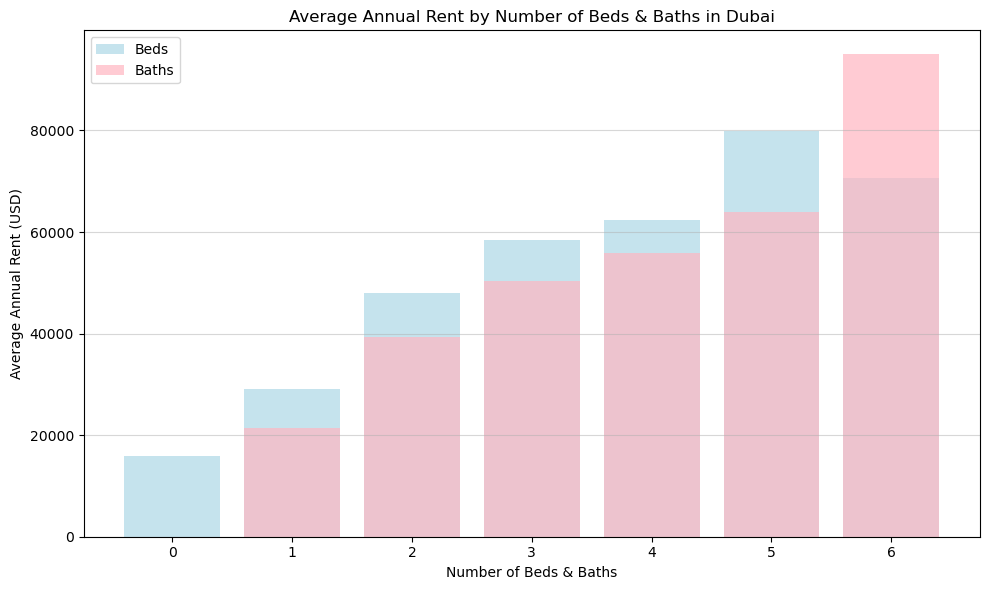

In [21]:
# exploring annual rent grouped by bed and bath count (mean)

prop_mean_beds_rent = prop.groupby('beds')['rent'].mean().reset_index()
prop_mean_baths_rent = prop.groupby('baths')['rent'].mean().reset_index()

# plotting
plt.figure(figsize=(10, 6))
# 'beds'
plt.bar(prop_mean_beds_rent['beds'], prop_mean_beds_rent['rent'], color='lightblue', alpha=0.7, label='Beds')
#'baths'
plt.bar(prop_mean_baths_rent['baths'], prop_mean_baths_rent['rent'], color='lightpink', alpha=0.7, label='Baths')

plt.title('Average Annual Rent by Number of Beds & Baths in Dubai')
plt.xlabel('Number of Beds & Baths')
plt.ylabel('Average Annual Rent (USD)')
plt.grid(axis='y', alpha=0.5)
plt.xticks(prop_mean_beds_rent['beds'])
plt.legend()
plt.tight_layout()
plt.show()

# we can see a generally positive relationship between these variables, but mostly for 'beds'

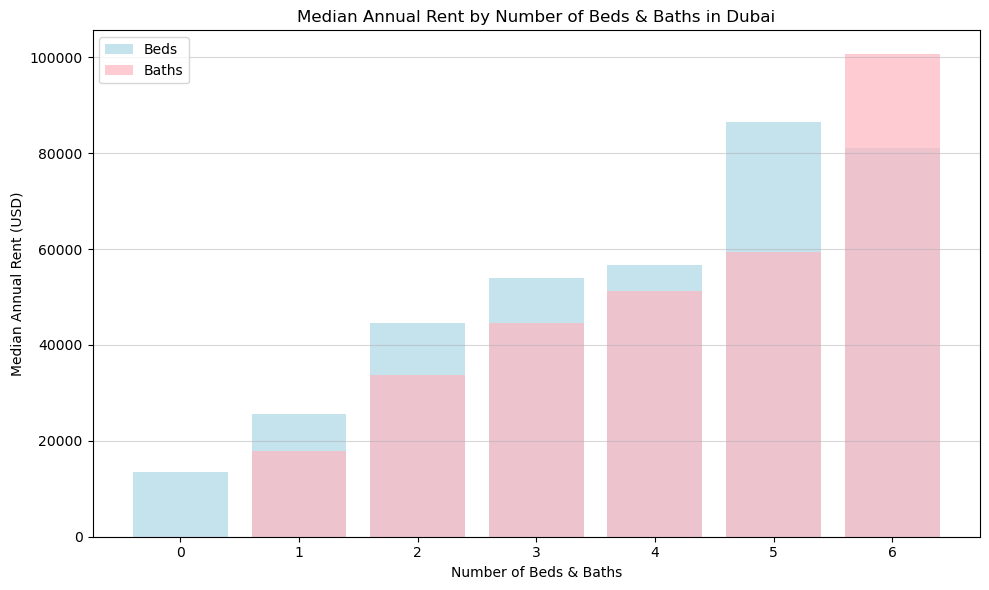

In [22]:
# comparing 'beds'/'baths' and 'rent' variable relationship (median)

prop_median_beds_rent = prop.groupby('beds')['rent'].median().reset_index()
prop_median_baths_rent = prop.groupby('baths')['rent'].median().reset_index()

# plotting
plt.figure(figsize=(10, 6))
# 'beds'
plt.bar(prop_median_beds_rent['beds'], prop_median_beds_rent['rent'], color='lightblue', alpha=0.7, label='Beds')
#'baths'
plt.bar(prop_median_baths_rent['baths'], prop_median_baths_rent['rent'], color='lightpink', alpha=0.7, label='Baths')

plt.title('Median Annual Rent by Number of Beds & Baths in Dubai')
plt.xlabel('Number of Beds & Baths')
plt.ylabel('Median Annual Rent (USD)')
plt.grid(axis='y', alpha=0.5)
plt.xticks(prop_median_beds_rent['beds'])
plt.legend()
plt.tight_layout()
plt.show()

# we can see a generally positive relationship between these variables, but mostly for 'beds'

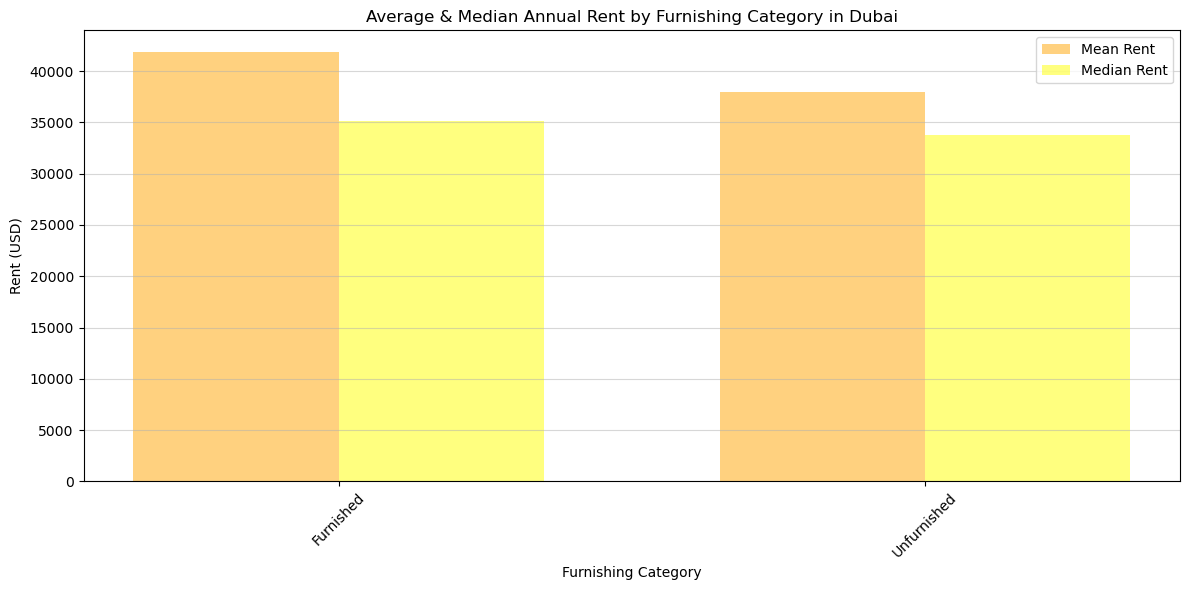

In [23]:
# exploring annual rent grouped by furnishing

# mean rent by furnishing category
prop_mean_furnishing_rent = prop.groupby('furnishing')['rent'].mean().reset_index()
prop_mean_furnishing_rent.sort_values(by='rent', ascending=False, inplace=True)

# median rent by furnishing category
prop_median_furnishing_rent = prop.groupby('furnishing')['rent'].median().reset_index()
prop_median_furnishing_rent.sort_values(by='rent', ascending=False, inplace=True)

# plotting
plt.figure(figsize=(12, 6))

bar_width = 0.35
x_pos = np.arange(len(prop_mean_furnishing_rent['furnishing']))
plt.bar(x_pos - bar_width/2, prop_mean_furnishing_rent['rent'], width=bar_width, color='orange', alpha=0.5, label='Mean Rent')
plt.bar(x_pos + bar_width/2, prop_median_furnishing_rent['rent'], width=bar_width, color='yellow', alpha=0.5, label='Median Rent')
plt.title('Average & Median Annual Rent by Furnishing Category in Dubai')
plt.xlabel('Furnishing Category')
plt.ylabel('Rent (USD)')
plt.grid(axis='y', alpha=0.5)
plt.xticks(x_pos, prop_mean_furnishing_rent['furnishing'], rotation=45)

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

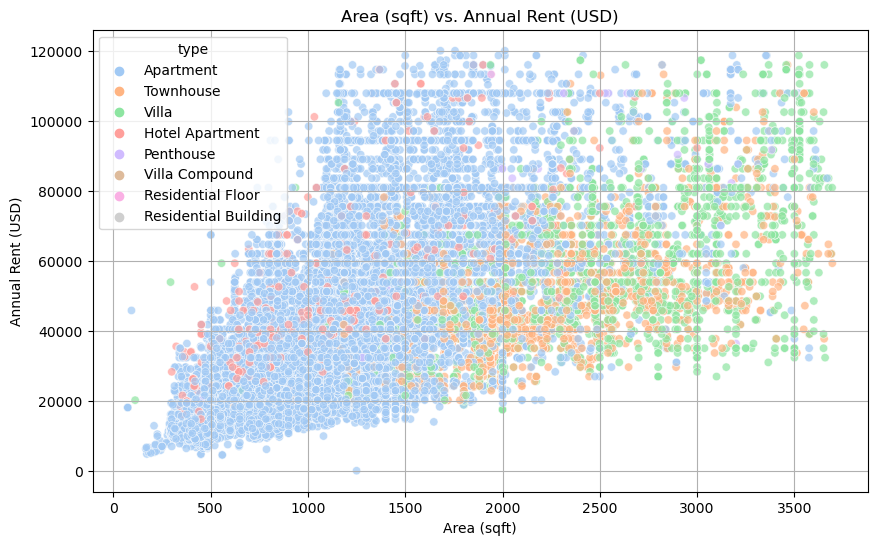

In [24]:
# 'area_sqft' versus 'rent' scatterplot while introducing type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=prop, x='area_sqft', y='rent', hue='type', palette='pastel', alpha=0.7)
plt.title('Area (sqft) vs. Annual Rent (USD)')
plt.xlabel('Area (sqft)')
plt.ylabel('Annual Rent (USD)')
plt.grid(True)
plt.show()

# positive relationship with area in sqft and annual rent. there is also an additional correlation between the property type and area.

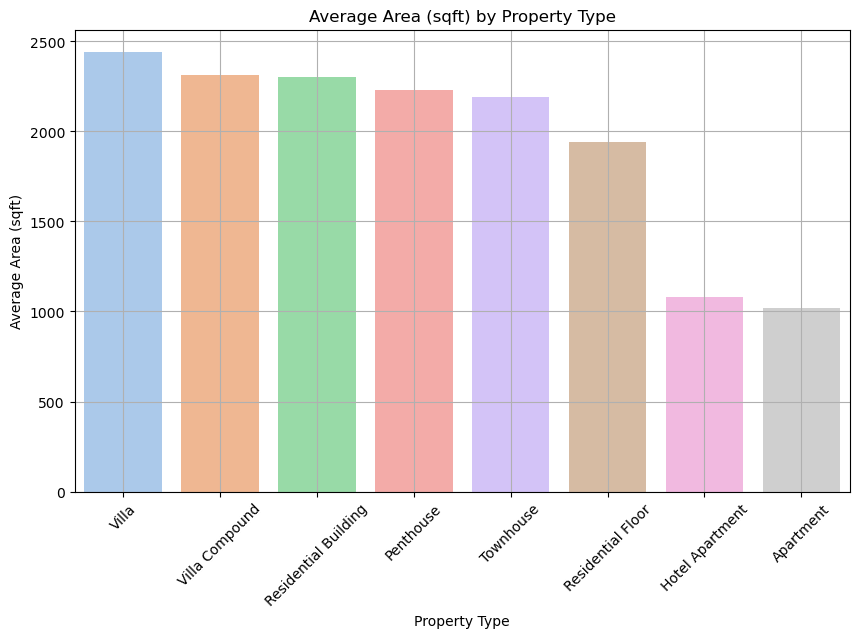

In [25]:
# observing area by property type distribution (taking a closer look)

# average area_sqft by property type
avg_area_by_type = prop.groupby('type')['area_sqft'].mean().reset_index()

# descending order
avg_area_by_type = avg_area_by_type.sort_values(by='area_sqft', ascending=False)

# plotting bar
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_area_by_type, x='type', y='area_sqft', palette='pastel')
plt.title('Average Area (sqft) by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Area (sqft)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

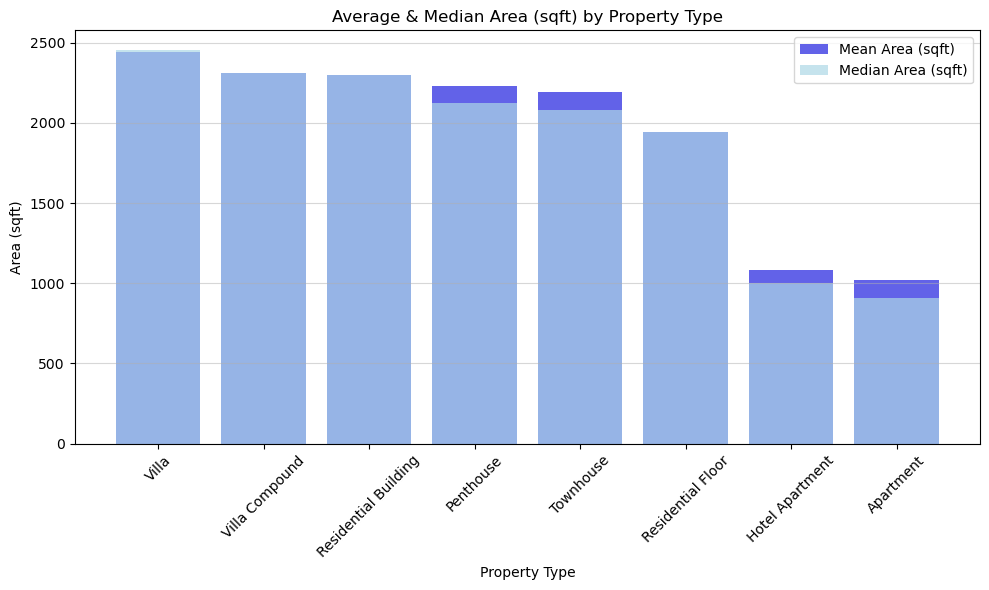

In [26]:
# mean area_sqft by property type
avg_area_by_type = prop.groupby('type')['area_sqft'].mean().reset_index()
avg_area_by_type = avg_area_by_type.sort_values(by='area_sqft', ascending=False)

# median area_sqft by property type
median_area_by_type = prop.groupby('type')['area_sqft'].median().reset_index()
median_area_by_type = median_area_by_type.sort_values(by='area_sqft', ascending=False)

# plotting
plt.figure(figsize=(10, 6))

sns.barplot(data=avg_area_by_type, x='type', y='area_sqft', color='blue', alpha=0.7, label='Mean Area (sqft)')
x_pos = range(len(avg_area_by_type['type']))
plt.bar(x_pos, median_area_by_type['area_sqft'], color='lightblue', alpha=0.7, label='Median Area (sqft)')

plt.title('Average & Median Area (sqft) by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Area (sqft)')
plt.grid(axis='y', alpha=0.5)
plt.xticks(x_pos, avg_area_by_type['type'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### DA - Snapshot (3):
Created multiple graphs that explore categorical variables along with additional numerical variables.
- #### Line Chart ('Average Annual Rent Price (USD) by Year and Property Type')
    - Most data is from 2023 and after, but 'Residential Buildings' and 'Residential Floors' seem to have the most positive impact on rent price over the span of a year.
- #### Stacked Barchart ('Average & Median Annual Rent by Property Type')
    - This bar chart displays the average and median annual rent price grouped by each individual property type. From the graph, we can observe the 'Residential Floor' and 'Residential Floor' types demand the highest prices, while 'Townhouse' and 'Apartment' types demand the lowest.
- #### Two Stacked Barcharts ('Median & Mean Annual Rent by Number of Beds & Baths in Dubai')
    - There are not significant differences between the mean and median, but there is a generally positive relationship between both variables and 'rent'. As the bed and bath count increase, so does the average rent price. This confirms the correlation matrix's findings, that both the 'beds' and 'baths' variables impact 'rent' price. These both will serve as predictors for our model.
- #### Double Barchart ('Average & Median Annual Rent by Furnishing Category in Dubai')
    - The graph shows that there is not a notable difference between the average value of furnished and an unfurnished property. The categorical 'furnishing' variable does not show a significant impact on rent prices in Dubai, so it will be overlooked when developing the predictive model.
- #### Scatterplot ('Area (sqft) vs. Annual Rent (USD)')
    - It illustrates a clearly positive linear relationship between both the property area and price. It shows that the 'Apartment' and 'Hotel Apartment' types have vastly lower square footage, with lower rent prices. Both 'Villa' and 'Townhouse' types are on the larger side, with higher rent values. It displays a broader picture of the data, and how important 'area_sqft' is as a predictor for both 'type' and 'rent'.
 - #### Barchart ('Average Area (sqft) by Property Type')
     - Leans further into the relationship between 'area_sqft' and 'type', and in turn, 'rent'.
 - #### Stacked Barchart ('Average & Median Area (sqft) by Property Type')
     - There isn’t a notable difference between the mean and median values. The 'Villa', 'Villa Compound', and 'Residential Building' types boast the highest square footage, while the 'Hotel Apartment' and 'Apartment' have the lowest. This confirms the relationship where the 'type' variable influences the 'area_sqft' variable, which then impacts the 'rent' variable.

### EDA Findings:

- #### Predictors to Test:
    - 'beds', 'baths', 'area_sqft', & 'type'